<a href="https://colab.research.google.com/github/FelipeFerAl/Data_Analytics/blob/main/CorrelationAndDataSelection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

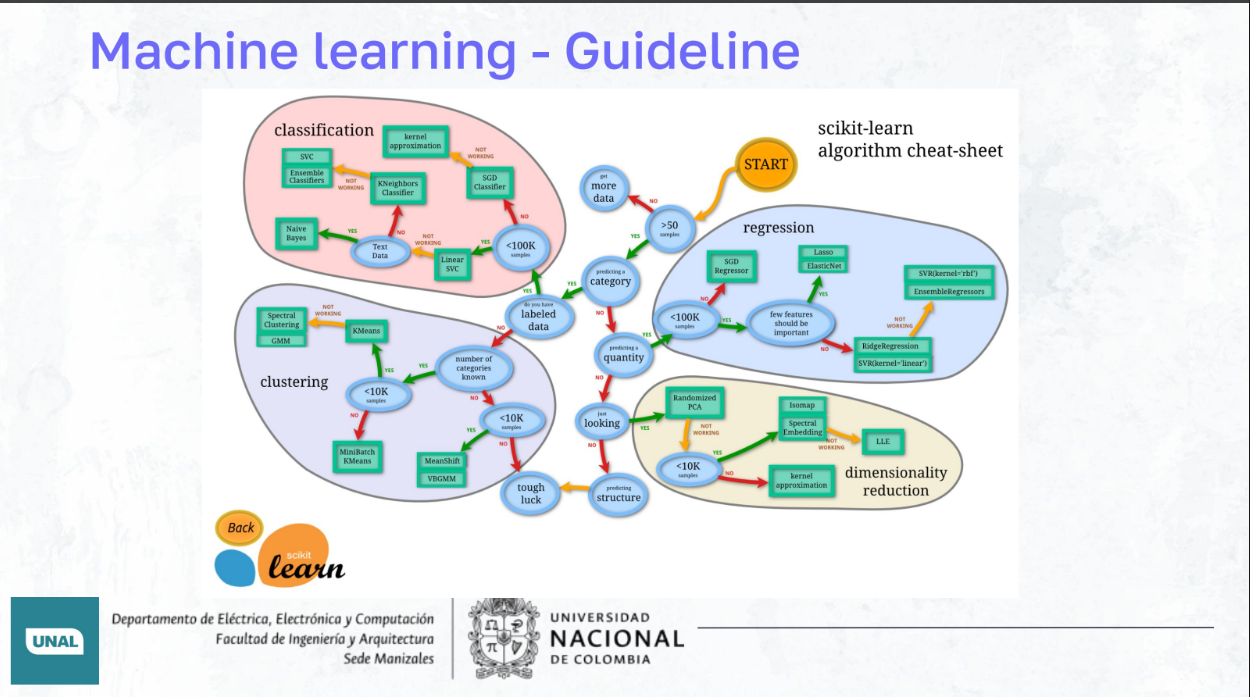

# Correlación entre variables

La correlación es un concepto estadístico que cuantifica el grado en que dos variables están relacionadas entre sí.

In [ ]:
import pandas as pd

# create dataframe
data = {
    "Temperature": [22, 25, 32, 28, 30],
    "Ice_Cream_Sales": [105, 120, 135, 130, 125]
}

df = pd.DataFrame(data)

# calculate correlation matrix
print(df.corr())

                 Temperature  Ice_Cream_Sales
Temperature         1.000000         0.923401
Ice_Cream_Sales     0.923401         1.000000


In [ ]:
df

Temperature  Ice_Cream_Sales
0           22              105
1           25              120
2           32              135
3           28              130
4           30              125

**Resultado:** Aquí, el coeficiente de correlación entre Temperature y Ice_Cream_Sales es **0,923401**, que es positivo. Esto indica que a medida que aumenta la temperatura, también aumentan las ventas de helados.

## Correlación positiva y correlación negativa

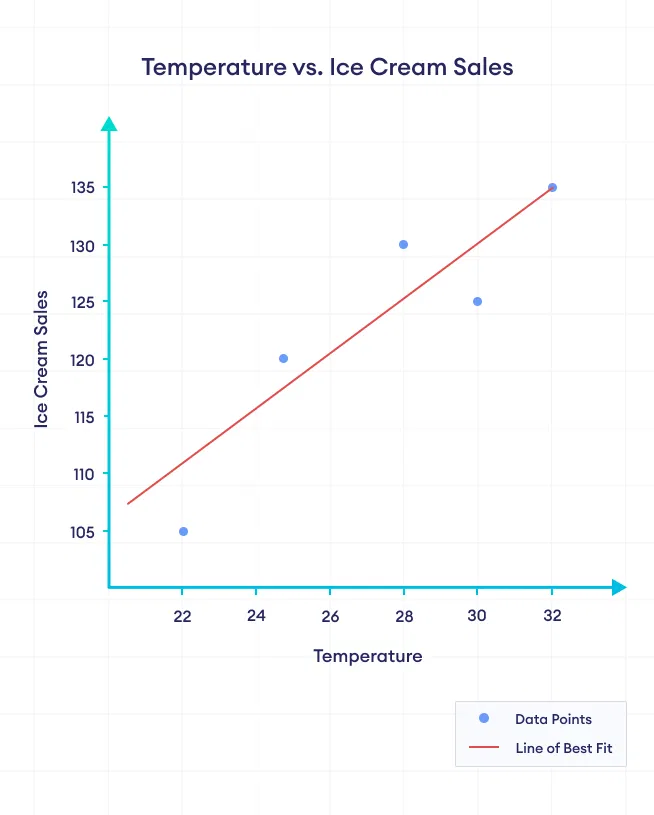


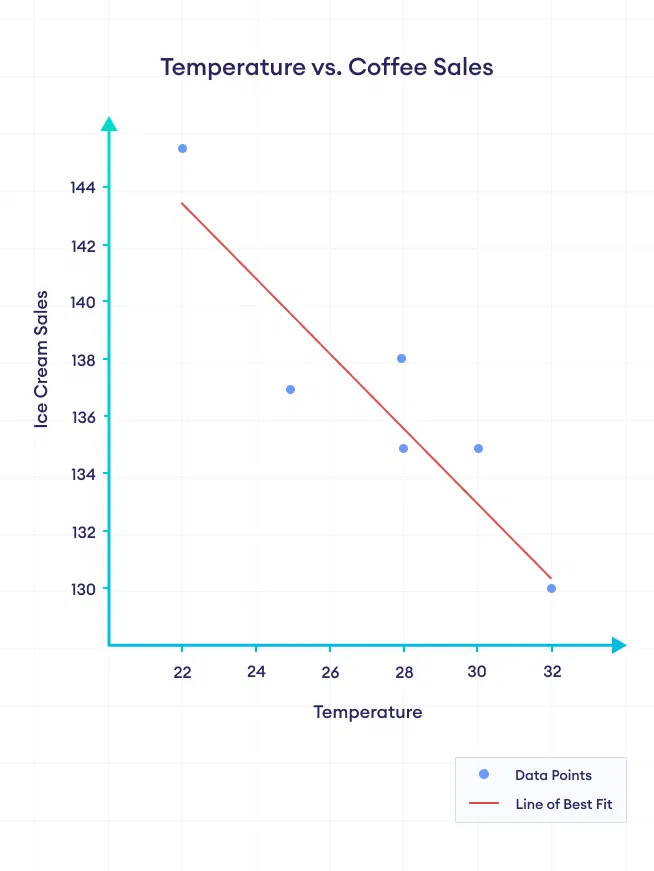

En lugar de encontrar toda la matriz de correlación, **podemos especificar las columnas** para calcular la correlación entre ellas.

In [ ]:
# calculate correlation coefficient
correlation = df['Temperature'].corr(df["Ice_Cream_Sales"])

print(correlation)

0.9234007664064656


## Ejemplo con valor faltantes (Missing values)

In [ ]:

import pandas as pd
import numpy as np

# create a dataframe
data = {
    "Temperature": [22, 25, 32, 28, 30],
    "Coffee_Sales": [158, 145, np.nan, np.nan, 140]
}

df = pd.DataFrame(data)

# calculate correlation between Temperature and Ice_Cream_sales
correlation1 = df["Temperature"].corr(df["Coffee_Sales"])

print("With NaN values")
print(df)
print(f"correlation = {correlation1}")
print()

# remove missing values
df.dropna(inplace=True)

# calculate correlation between Temperature and Ice_Cream_sales
correlation2 = df["Temperature"].corr(df["Coffee_Sales"])

print("Without NaN values")
print(df)
print(f"correlation = {correlation2}")
print()

With NaN values
   Temperature  Coffee_Sales
0           22         158.0
1           25         145.0
2           32           NaN
3           28           NaN
4           30         140.0
correlation = -0.923177938058926

Without NaN values
   Temperature  Coffee_Sales
0           22         158.0
1           25         145.0
4           30         140.0
correlation = -0.923177938058926



## Métodos de correlación

Podemos calcular la correlación usando tres métodos diferentes en Pandas:

* **Método Pearson** (predeterminado): evalúa la relación lineal entre dos variables continuas.
* **Método Kendall**: mide la asociación ordinal entre dos cantidades medidas.
* **Método Spearman**: evalúa la relación monótona entre dos variables continuas u ordinales.

De forma predeterminada, corr() calcula el *coeficiente de correlación de Pearson*, que mide la relación lineal entre dos variables.

In [ ]:
import pandas as pd

# create dataframe
data = {
    "Temperature": [22, 25, 32, 28, 30],
    "Ice_Cream_Sales": [105, 120, 135, 130, 125]
}

df = pd.DataFrame(data)

# calculate different correlation coefficients
pearson = df['Temperature'].corr(df["Ice_Cream_Sales"])
kendall = df['Temperature'].corr(df["Ice_Cream_Sales"], method='kendall')
spearman = df['Temperature'].corr(df["Ice_Cream_Sales"], method='spearman')

# display different correlation coefficient
print(f"Pearson's Coefficient: {pearson}")
print(f"Kendall's Coefficient: {kendall}")
print(f"Spearman's Coefficient: {spearman}")

Pearson's Coefficient: 0.9234007664064656
Kendall's Coefficient: 0.7999999999999999
Spearman's Coefficient: 0.8999999999999998


**Resultado:** Aquí, el coeficiente de Pearson tiene el valor más alto, lo que significa que la correlación es mayoritariamente lineal.

## Una mala correlación

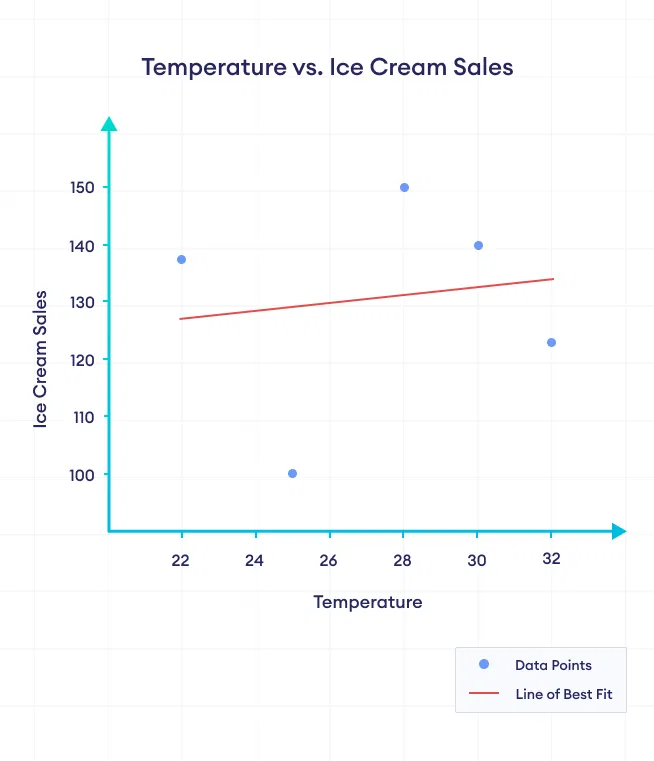

In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo
np.random.seed(0)
data = {
    'altura': np.random.normal(170, 10, 100),
    'peso': np.random.normal(70, 5, 100)
}

df = pd.DataFrame(data)

# Calcular la correlación de Pearson
pearson_corr = df.corr(method='pearson')
print("Correlación de Pearson:\n", pearson_corr)

# Calcular la correlación de Spearman
spearman_corr = df.corr(method='spearman')
print("\nCorrelación de Spearman:\n", spearman_corr)

# Calcular la correlación de Kendall
kendall_corr = df.corr(method='kendall')
print("\nCorrelación de Kendall:\n", kendall_corr)

Correlación de Pearson:
           altura      peso
altura  1.000000  0.111729
peso    0.111729  1.000000

Correlación de Spearman:
           altura      peso
altura  1.000000  0.089877
peso    0.089877  1.000000

Correlación de Kendall:
           altura      peso
altura  1.000000  0.061414
peso    0.061414  1.000000


In [ ]:
df

altura       peso
0   187.640523  79.415753
1   174.001572  63.261205
2   179.787380  63.647575
3   192.408932  74.846984
4   188.675580  64.134383
..         ...        ...
95  177.065732  69.142268
96  170.105000  73.858953
97  187.858705  74.117521
98  171.269121  80.816180
99  174.019894  76.682640

[100 rows x 2 columns]

## Ejemplo de la vida real - Spearman

Imagina que quieres analizar la relación entre el orden de llegada de los participantes en una carrera de 100 metros y su orden de llegada en una carrera de 200 metros. No necesariamente habrá una relación lineal (es decir, el que llega primero en la carrera de 100 metros no siempre será el primero en la de 200 metros), pero puedes esperar una relación monótona: los que llegaron primeros en una carrera tienden a llegar primeros en la otra.

In [ ]:
import pandas as pd
import numpy as np

# Crear un DataFrame de ejemplo con rankings
data = {
    'ranking_100m': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'ranking_200m': [2, 1, 4, 3, 6, 5, 7, 8, 9, 10]
}

df = pd.DataFrame(data)

# Calcular la correlación de Spearman
spearman_corr = df.corr(method='spearman')
print("Correlación de Spearman:\n", spearman_corr)

# Calcular la correlación de Kendall
kendall_corr = df.corr(method='kendall')
print("\nCorrelación de Kendall:\n", kendall_corr)

Correlación de Spearman:
               ranking_100m  ranking_200m
ranking_100m      1.000000      0.963636
ranking_200m      0.963636      1.000000

Correlación de Kendall:
               ranking_100m  ranking_200m
ranking_100m      1.000000      0.866667
ranking_200m      0.866667      1.000000


## Ejemplo de la vida real - Kendall

Supongamos que estás interesado en la relación entre la preferencia de los empleados por diferentes tipos de café (expresada en una encuesta) y su orden de elección en una cafetería. Por ejemplo, si los empleados que prefieren el café expreso también tienden a elegir primero el expreso sobre otras bebidas en la cafetería, esto muestra una relación ordinal.

In [ ]:
import pandas as pd

# Crear un DataFrame de ejemplo con satisfacción e importancia
data = {
    'satisfaccion': [8, 7, 6, 5, 9, 4, 3, 2, 10, 1],  # Satisfacción en diferentes aspectos del trabajo
    'importancia': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]  # Importancia de esos aspectos
}

df = pd.DataFrame(data)

# Calcular la correlación de Kendall
kendall_corr = df.corr(method='kendall')
print("Correlación de Kendall:\n", kendall_corr)

Correlación de Kendall:
               satisfaccion  importancia
satisfaccion      1.000000    -0.466667
importancia      -0.466667     1.000000


**Interpretación del resultado:** La salida mostrará una matriz de correlación donde la correlación de Kendall entre la satisfacción y la importancia será evaluada. Un valor cercano a 1 indica una fuerte relación ordinal (es decir, los empleados que están más satisfechos con ciertos aspectos también los consideran más importantes). Un valor cercano a 0 indica poca o ninguna relación ordinal, y un valor cercano a -1 indica una fuerte relación ordinal inversa (es decir, los empleados que están menos satisfechos con ciertos aspectos los consideran más importantes).

## Visualizando la matriz de correlación

Usaremos los datos de [cáncer de mama](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), una clasificación binaria popular

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
breast_cancer = load_breast_cancer()
data = breast_cancer.data
features = breast_cancer.feature_names
df = pd.DataFrame(data, columns = features)
print(df.shape)
print(features)

(569, 30)
['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']


In [ ]:
breast_cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [ ]:
df

mean radius  mean texture  mean perimeter  mean area  mean smoothness  \
0          17.99         10.38          122.80     1001.0          0.11840   
1          20.57         17.77          132.90     1326.0          0.08474   
2          19.69         21.25          130.00     1203.0          0.10960   
3          11.42         20.38           77.58      386.1          0.14250   
4          20.29         14.34          135.10     1297.0          0.10030   
..           ...           ...             ...        ...              ...   
564        21.56         22.39          142.00     1479.0          0.11100   
565        20.13         28.25          131.20     1261.0          0.09780   
566        16.60         28.08          108.30      858.1          0.08455   
567        20.60         29.33          140.10     1265.0          0.11780   
568         7.76         24.54           47.92      181.0          0.05263   

     mean compactness  mean concavity  mean concave points  mean symmetry  \
0             0.27760         0.30010              0.14710         0.2419   
1             0.07864         0.08690              0.07017         0.1812   
2             0.15990         0.19740              0.12790         0.2069   
3             0.28390         0.24140              0.10520         0.2597   
4             0.13280         0.19800              0.10430         0.1809   
..                ...             ...                  ...            ...   
564           0.11590         0.24390              0.13890         0.1726   
565           0.10340         0.14400              0.09791         0.1752   
566           0.10230         0.09251              0.05302         0.1590   
567           0.27700         0.35140              0.15200         0.2397   
568           0.04362         0.00000              0.00000         0.1587   

     mean fractal dimension  ...  worst radius  worst texture  \
0                   0.07871  ...        25.380          17.33   
1                   0.05667  ...        24.990          23.41   
2                   0.05999  ...        23.570          25.53   
3                   0.09744  ...        14.910          26.50   
4                   0.05883  ...        22.540          16.67   
..                      ...  ...           ...            ...   
564                 0.05623  ...        25.450          26.40   
565                 0.05533  ...        23.690          38.25   
566                 0.05648  ...        18.980          34.12   
567                 0.07016  ...        25.740          39.42   
568                 0.05884  ...         9.456          30.37   

     worst perimeter  worst area  worst smoothness  worst compactness  \
0             184.60      2019.0           0.16220            0.66560   
1             158.80      1956.0           0.12380            0.18660   
2             152.50      1709.0           0.14440            0.42450   
3              98.87       567.7           0.20980            0.86630   
4             152.20      1575.0           0.13740            0.20500   
..               ...         ...               ...                ...   
564           166.10      2027.0           0.14100            0.21130   
565           155.00      1731.0           0.11660            0.19220   
566           126.70      1124.0           0.11390            0.30940   
567           184.60      1821.0           0.16500            0.86810   
568            59.16       268.6           0.08996            0.06444   

     worst concavity  worst concave points  worst symmetry  \
0             0.7119                0.2654          0.4601   
1             0.2416                0.1860          0.2750   
2             0.4504                0.2430          0.3613   
3             0.6869                0.2575          0.6638   
4             0.4000                0.1625          0.2364   
..               ...                   ...             ...   
564           0.4107                0.2216         

**Objetivo:** Determinar la relación entre cada par de estas columnas. Lo haremos trazando la matriz de correlación.

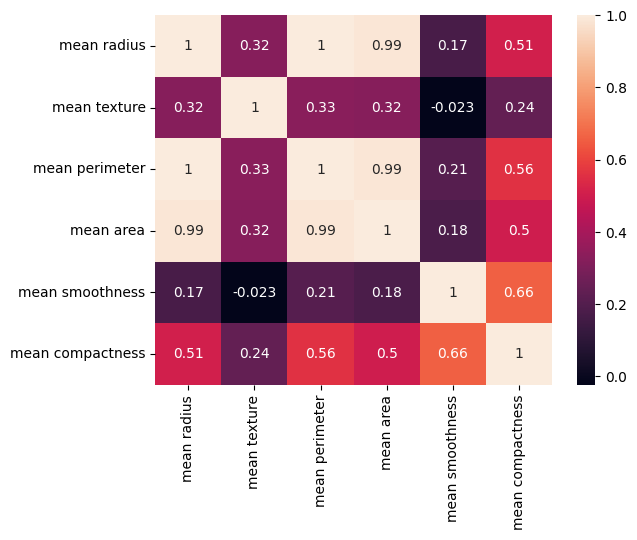

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# taking all rows but only 6 columns
df_small = df.iloc[:,:6]
correlation_mat = df_small.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

# Selección de variables/características

### Base de datos: [Mobile Price Classification](https://www.kaggle.com/datasets/iabhishekofficial/mobile-price-classification?select=train.csv)

**Contexto**

Bob ha iniciado su propia empresa de telefonía móvil. Quiere dar una dura lucha a las grandes empresas como Apple, Samsung, etc.

No sabe cómo estimar el precio de los móviles que fabrica su empresa. En este competitivo mercado de la telefonía móvil no se pueden simplemente dar por sentado las cosas. Para solucionar este problema recopila datos de ventas de teléfonos móviles de varias empresas.

Bob quiere descubrir alguna relación entre las características de un teléfono móvil (por ejemplo: RAM, memoria interna, etc.) y su precio de venta.

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import SelectKBest, mutual_info_classif, RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

# Cargar los datos
file_path = '/content/train.csv'
data = pd.read_csv(file_path)

# Descripción de los datos
data.describe()

battery_power       blue  clock_speed     dual_sim           fc  \
count    2000.000000  2000.0000  2000.000000  2000.000000  2000.000000   
mean     1238.518500     0.4950     1.522250     0.509500     4.309500   
std       439.418206     0.5001     0.816004     0.500035     4.341444   
min       501.000000     0.0000     0.500000     0.000000     0.000000   
25%       851.750000     0.0000     0.700000     0.000000     1.000000   
50%      1226.000000     0.0000     1.500000     1.000000     3.000000   
75%      1615.250000     1.0000     2.200000     1.000000     7.000000   
max      1998.000000     1.0000     3.000000     1.000000    19.000000   

            four_g   int_memory        m_dep    mobile_wt      n_cores  ...  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000  ...   
mean      0.521500    32.046500     0.501750   140.249000     4.520500  ...   
std       0.499662    18.145715     0.288416    35.399655     2.287837  ...   
min       0.000000     2.000000     0.100000    80.000000     1.000000  ...   
25%       0.000000    16.000000     0.200000   109.000000     3.000000  ...   
50%       1.000000    32.000000     0.500000   141.000000     4.000000  ...   
75%       1.000000    48.000000     0.800000   170.000000     7.000000  ...   
max       1.000000    64.000000     1.000000   200.000000     8.000000  ...   

         px_height     px_width          ram         sc_h         sc_w  \
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000   
mean    645.108000  1251.515500  2124.213000    12.306500     5.767000   
std     443.780811   432.199447  1084.732044     4.213245     4.356398   
min       0.000000   500.000000   256.000000     5.000000     0.000000   
25%     282.750000   874.750000  1207.500000     9.000000     2.000000   
50%     564.000000  1247.000000  2146.500000    12.000000     5.000000   
75%     947.250000  1633.000000  3064.500000    16.000000     9.000000   
max    1960.000000  1998.000000  3998.000000    19.000000    18.000000   

         talk_time      three_g  touch_screen         wifi  price_range  
count  2000.000000  2000.000000   2000.000000  2000.000000  2000.000000  
mean     11.011000     0.761500      0.503000     0.507000     1.500000  
std       5.463955     0.426273      0.500116     0.500076     1.118314  
min       2.000000     0.000000      0.000000     0.000000     0.000000  
25%       6.000000     1.000000      0.000000     0.000000     0.750000  
50%      11.000000     1.000000      1.000000     1.000000     1.500000  
75%      16.000000     1.000000      1.000000     1.000000     2.250000  
max      20.000000     1.000000      1.000000     1.000000     3.000000  

[8 rows x 21 columns]

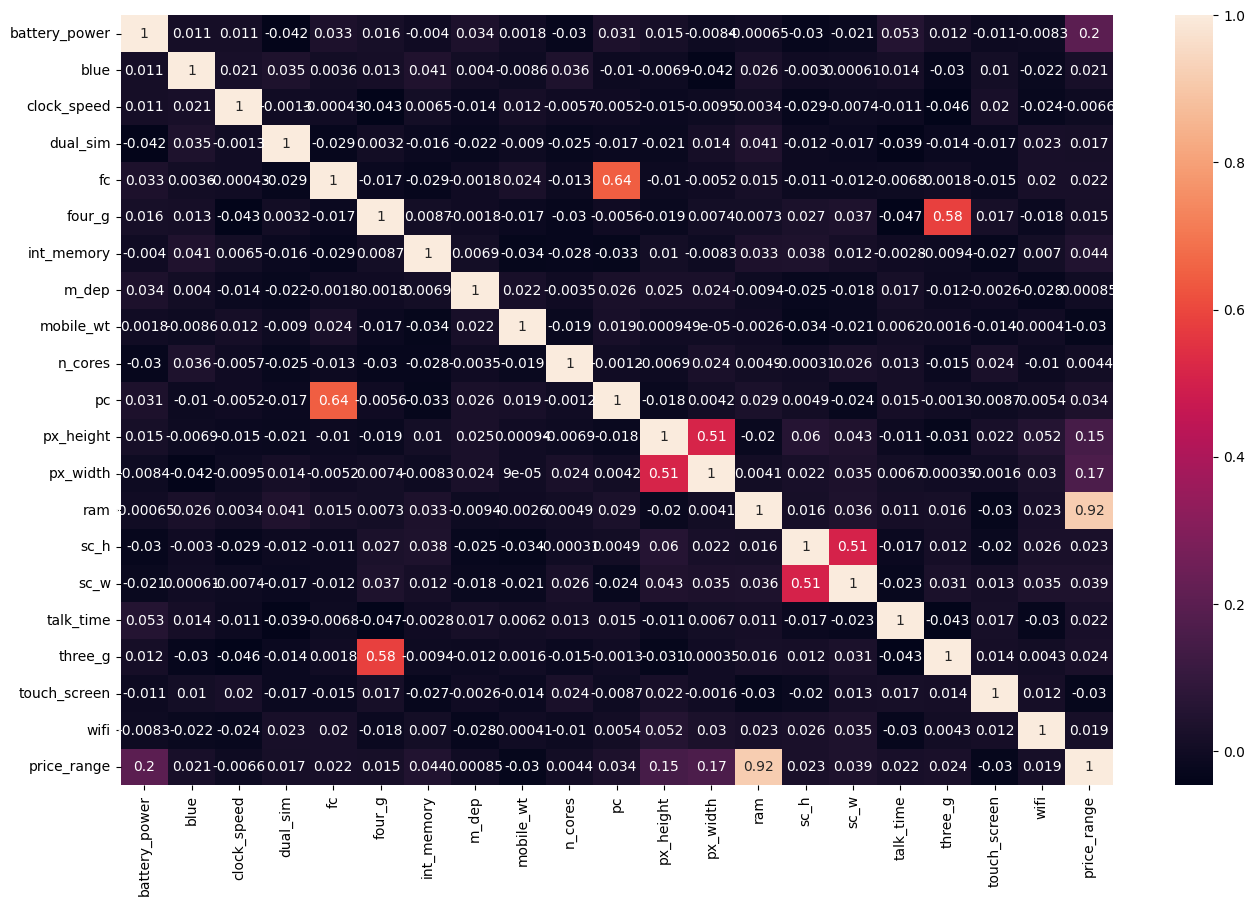

In [ ]:
plt.figure(figsize=(16, 10))
correlation_mat = data.corr()
sns.heatmap(correlation_mat, annot = True)
plt.show()

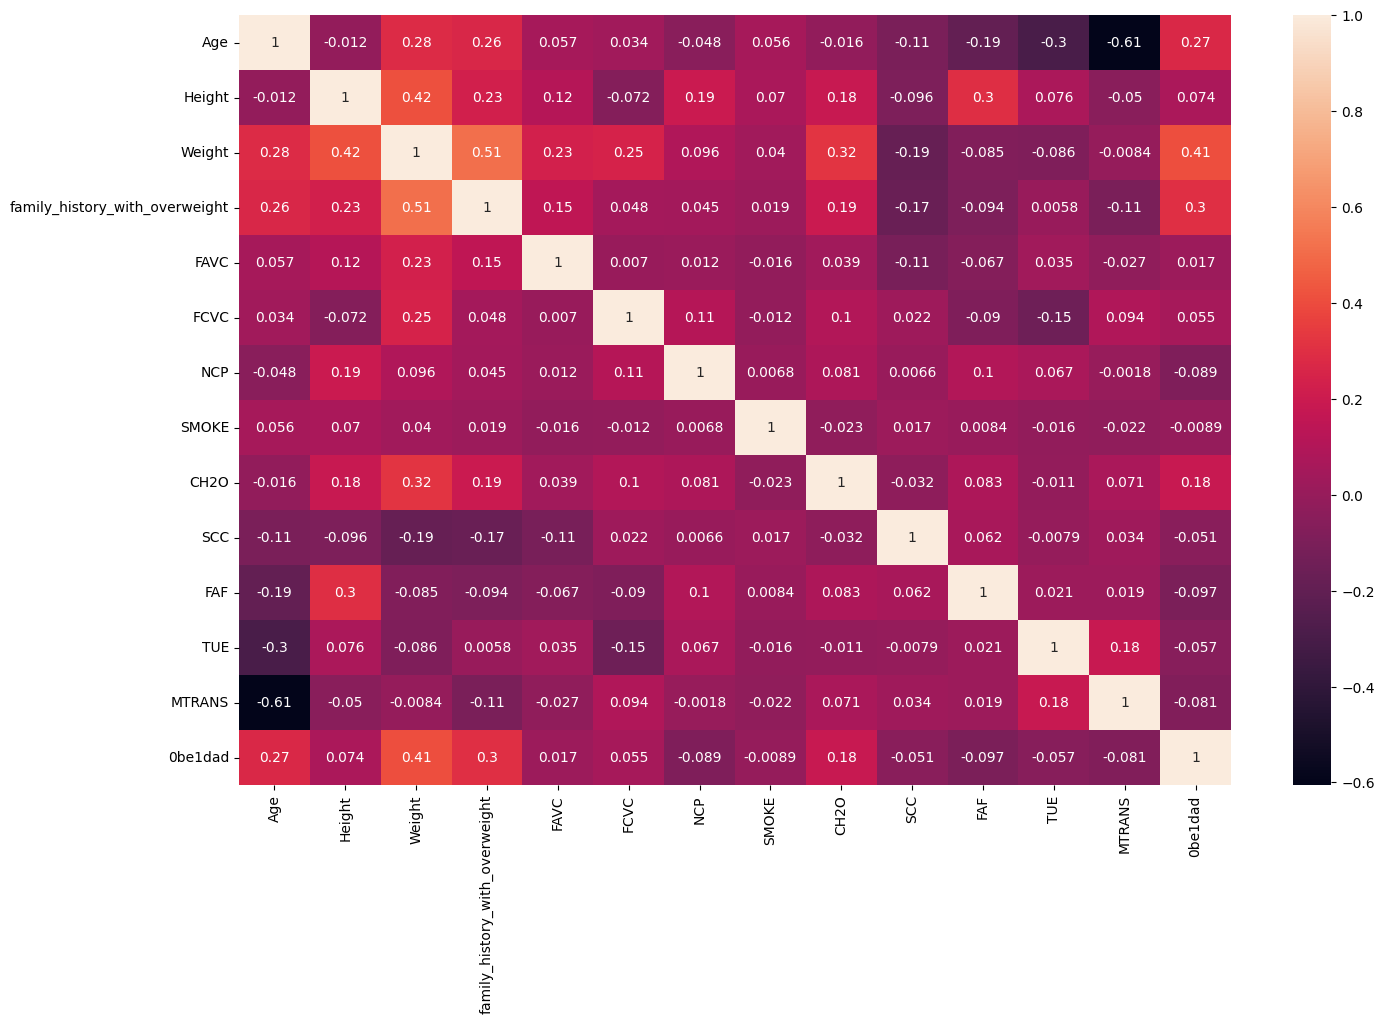

In [ ]:
from sklearn.preprocessing import LabelEncoder

path='/content/obesity_level.csv'
datos=pd.read_csv(path)

datos2=datos.drop(columns=['id','Gender','CAEC','CALC'])
le=LabelEncoder()
datos2['0be1dad']=le.fit_transform(datos2['0be1dad'])
datos2['MTRANS']=le.fit_transform(datos2['MTRANS'])

plt.figure(figsize=(16,10))
correlation_mat=datos2.corr()
sns.heatmap(correlation_mat, annot=True)
plt.show()

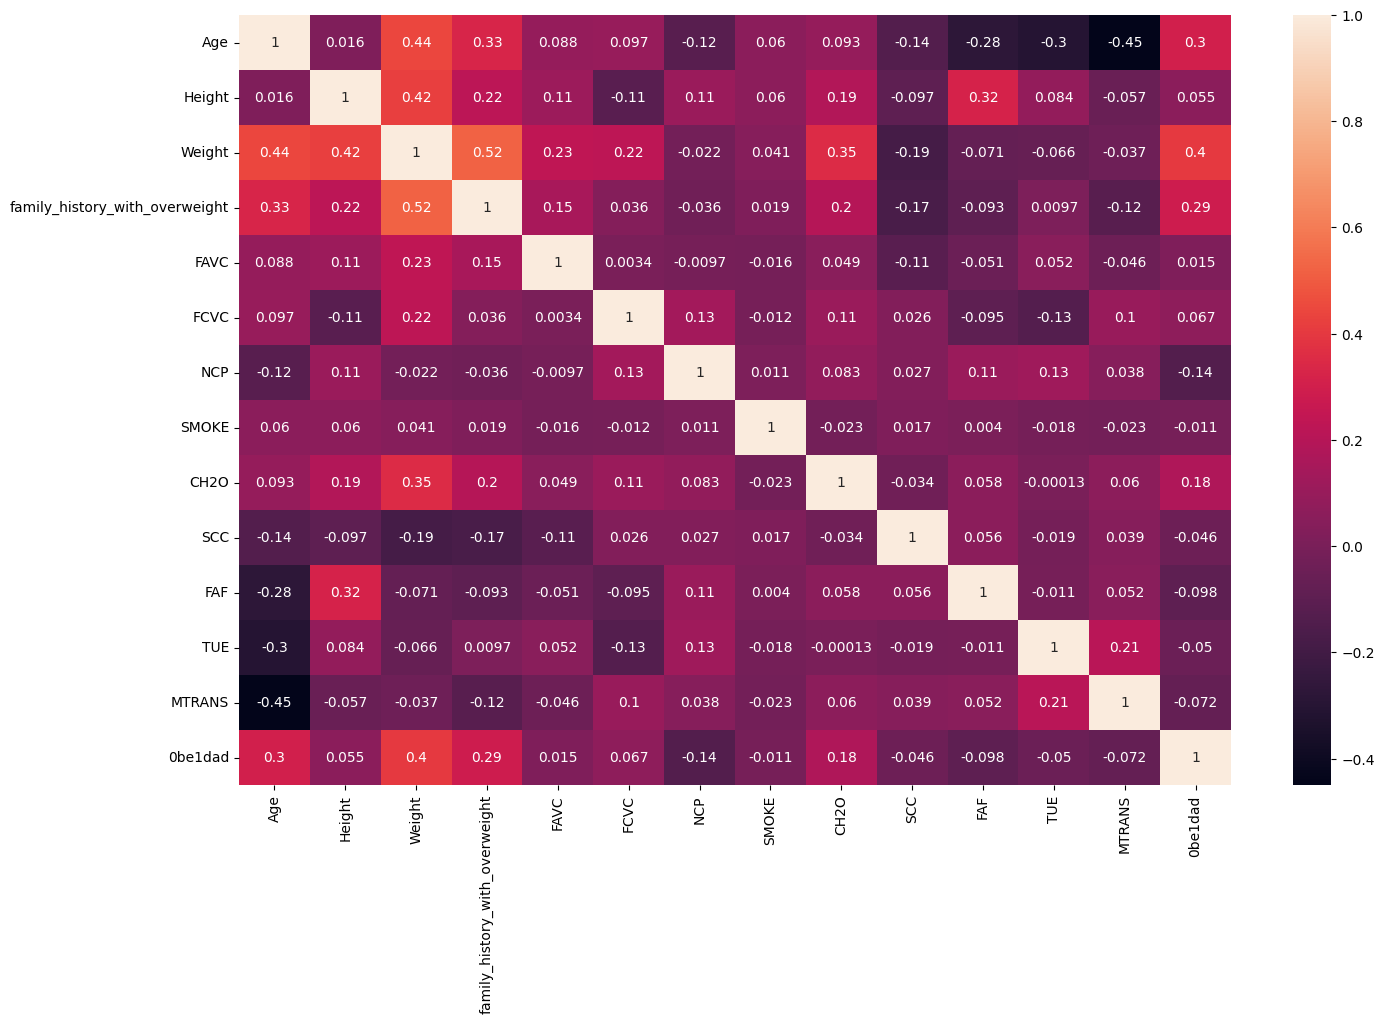

In [ ]:
plt.figure(figsize=(16,10))
correlation_mat=datos2.corr('spearman')
sns.heatmap(correlation_mat, annot=True)
plt.show()

## Análisis de correlación

In [ ]:
# Matriz de correlación
plt.figure(figsize=(15, 10))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

**¿Algún comentario?**

*   Implementar la correlación de **Spearman**
*   Implementar la correlación de **Kendall**



## Selección de características usando GINI INDEX

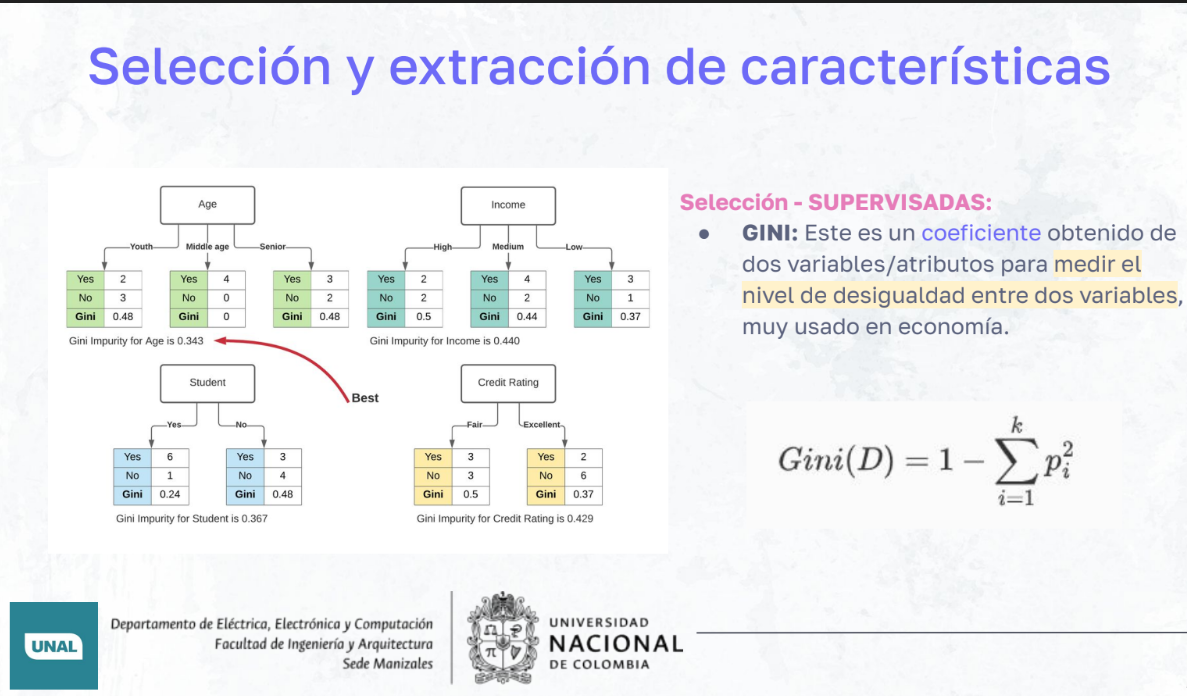

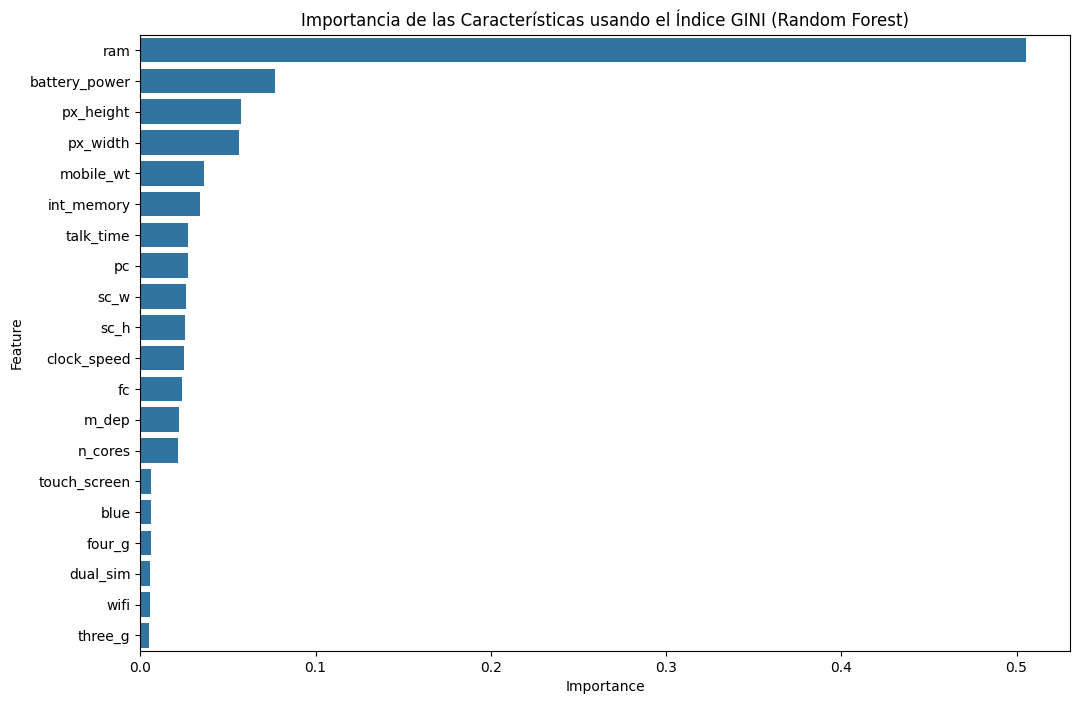

In [ ]:
# Escalado de los datos
scaler = StandardScaler()
X = data.drop('price_range', axis=1)
y = data['price_range']
X_scaled = scaler.fit_transform(X)

# Selección de características usando el índice GINI (Random Forest)
forest = RandomForestClassifier(random_state=0)
forest.fit(X_scaled, y)
importances = forest.feature_importances_

# Crear un DataFrame para visualizar la importancia de las características
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Gráfico de importancia de características (GINI)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Importancia de las Características usando el Índice GINI (Random Forest)')
plt.show()

**¿Algún comentario?**

## Selección de características usando RELIEFF

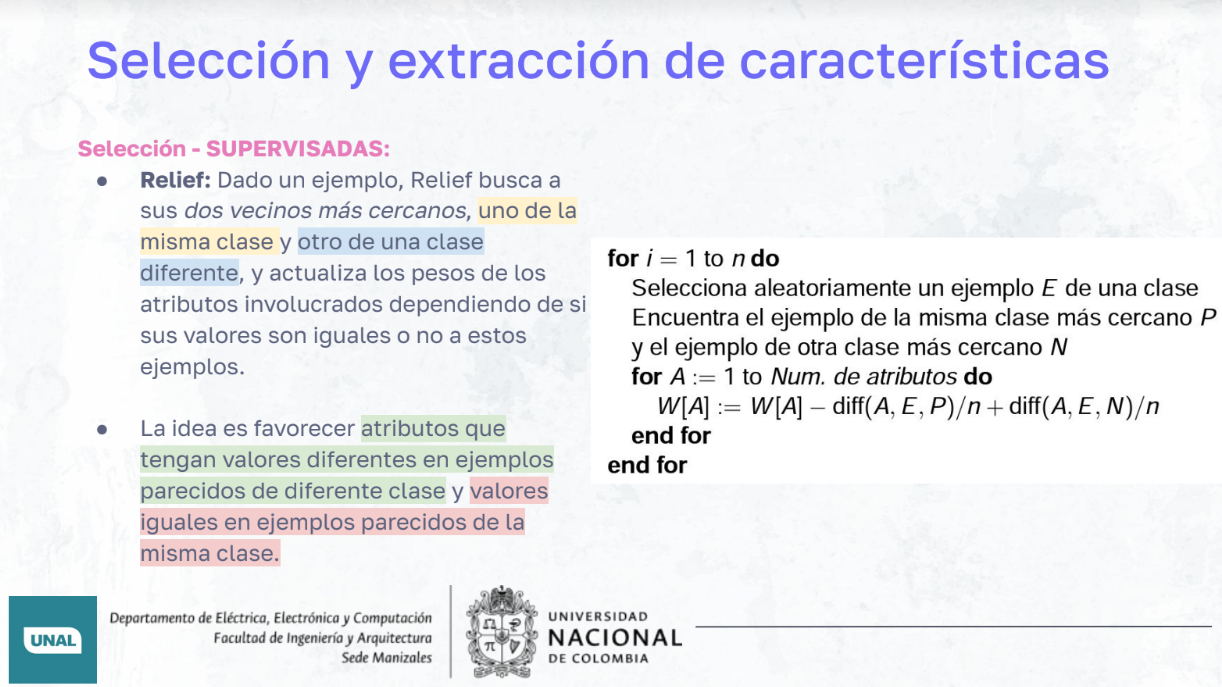

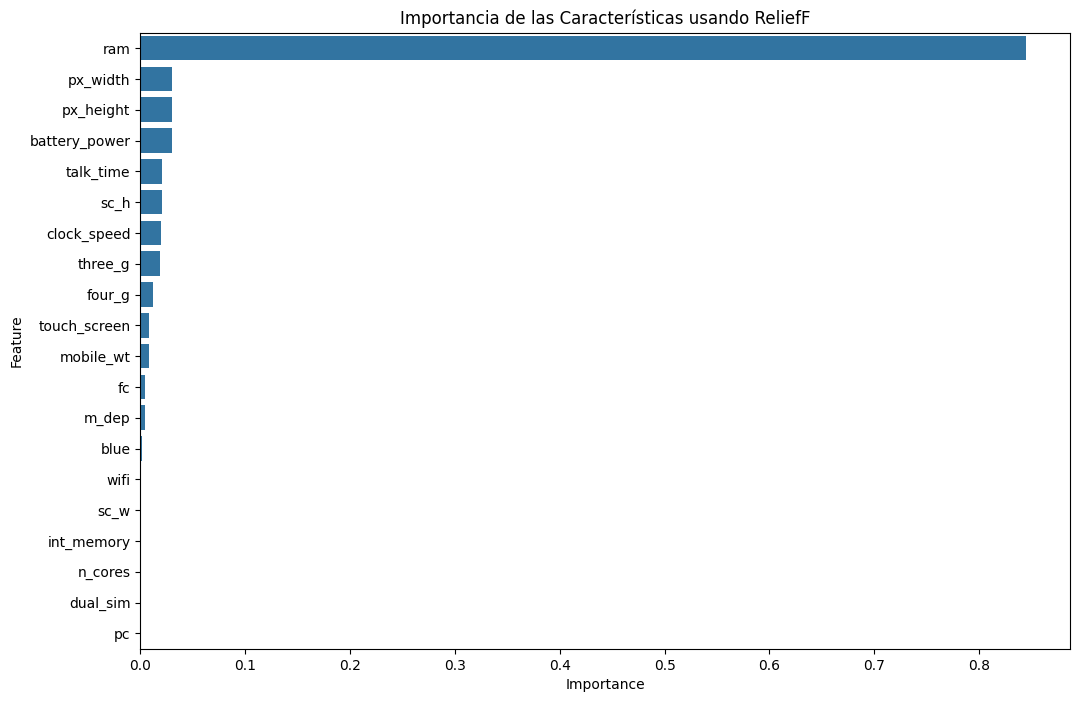

In [ ]:
# Selección de características usando el método ReliefF
selector = SelectKBest(score_func=mutual_info_classif, k='all')
selector.fit(X_scaled, y)
relief_scores = selector.scores_

# Crear un DataFrame para visualizar la importancia de las características
relief_importances = pd.DataFrame({'Feature': X.columns, 'Importance': relief_scores})
relief_importances = relief_importances.sort_values(by='Importance', ascending=False)

# Gráfico de importancia de características (ReliefF)
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=relief_importances)
plt.title('Importancia de las Características usando ReliefF')
plt.show()

Seguir el siguiente [tutorial](https://medium.com/@yashdagli98/feature-selection-using-relief-algorithms-with-python-example-3c2006e18f83) para montar el algoritmo de forma manual!

## Selección de características usando Eliminación Recursiva de Características

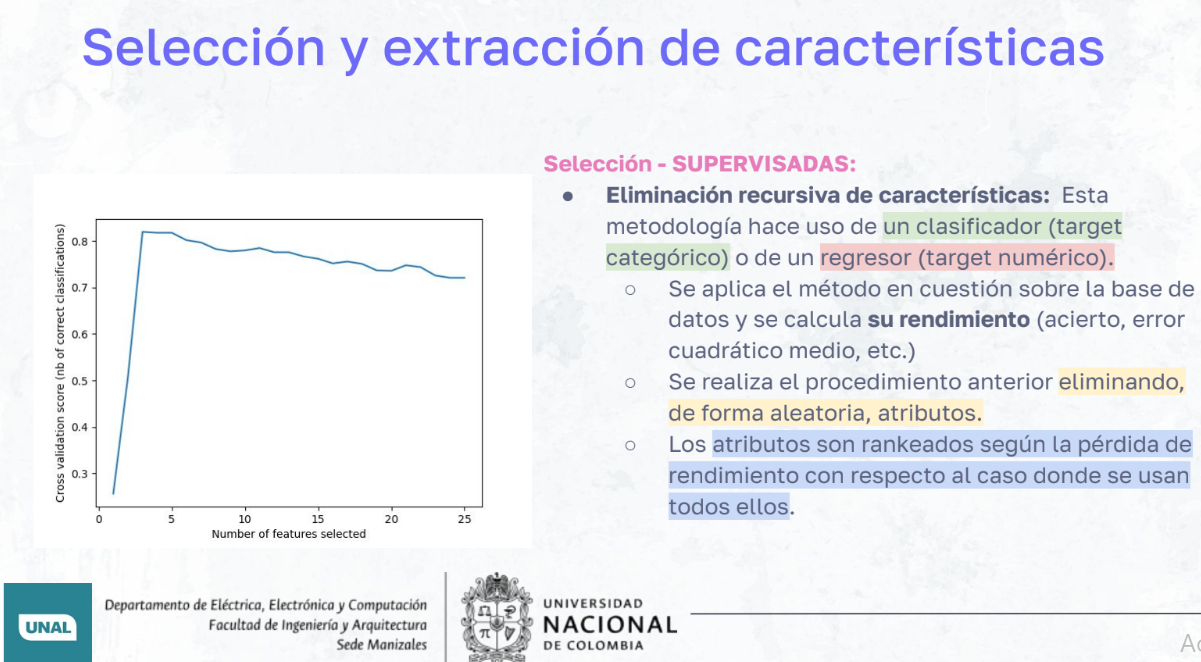

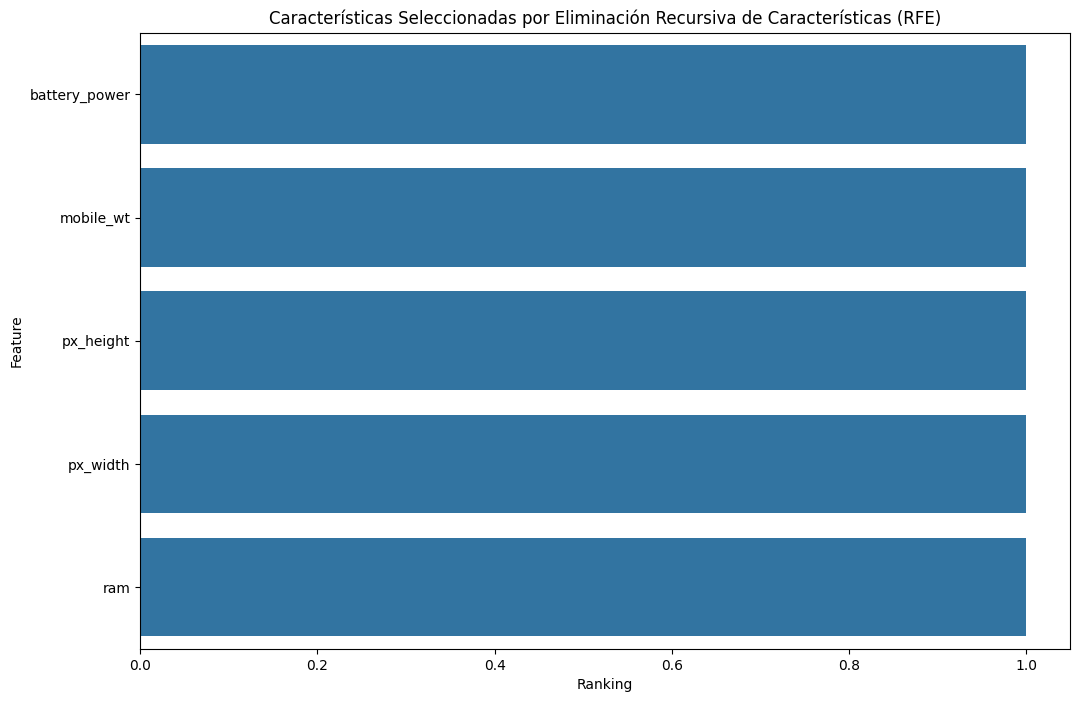

Feature  Support  Ranking
0   battery_power     True        1
8       mobile_wt     True        1
11      px_height     True        1
12       px_width     True        1
13            ram     True        1

In [ ]:
# Selección de características usando la Eliminación Recursiva de Características (RFE)
rfe_selector = RFE(estimator=forest, n_features_to_select=5, step=1)
rfe_selector.fit(X_scaled, y)
rfe_support = rfe_selector.support_
rfe_ranking = rfe_selector.ranking_

# Crear un DataFrame para visualizar la importancia de las características
rfe_importances = pd.DataFrame({'Feature': X.columns, 'Support': rfe_support, 'Ranking': rfe_ranking})
rfe_selected_features = rfe_importances[rfe_importances['Support'] == True]

# Gráfico de características seleccionadas por RFE
plt.figure(figsize=(12, 8))
sns.barplot(x='Ranking', y='Feature', data=rfe_selected_features.sort_values(by='Ranking', ascending=True))
plt.title('Características Seleccionadas por Eliminación Recursiva de Características (RFE)')
plt.show()

# Mostrar las características seleccionadas por RFE
rfe_selected_features

In [ ]:
rfe_support

array([ True, False, False, False, False, False, False, False,  True,
       False, False,  True,  True,  True, False, False, False, False,
       False, False])

In [ ]:
rfe_ranking

array([ 1, 15,  7, 12,  8, 11,  2,  9,  1, 10,  3,  1,  1,  1,  6,  5,  4,
       16, 13, 14])

### New Section